In [31]:
import tensorflow as tf
print("TensorFlow:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow: 2.10.0
Built with CUDA: True
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


![alt text](image.png)


![alt text](image-1.png)

- فرق پرسپترون با دیپ اینه که پرسپترون فقط خطی حساب میکنه ولی اون یکی غیر خطی


In [2]:
import numpy as np

In [3]:
def step(x):
    if x>=0:
        return 1
    return 0

In [4]:
# def perceptron(x,w):
#     t = x*w
#     t = sum(t)
#     return step(t)

def perceptron(x,w):
    x_new = x.reshape(1,-1)
    w_new = w.reshape(-1,1)
    r = x_new.dot(w_new)
    return step(r)

![alt text](image-2.png)

In [5]:
def p_not(x):
    y = -1 * x + 0.5
    return step(y)

not

In [6]:
x = np.array([1,0])
w = np.array([0.5,-1])
perceptron(x,w)

1

and

In [7]:
x = np.array([1,1,1])
w = np.array([-1.5,1,1])
perceptron(x,w)

1

![alt text](image-3.png)

![alt text](image-4.png)


- Tenserflow -> teano(C++) -> Google -> معماریش فیکس و استاتیک -> برای صنعت بهتره
- Pytorch -> Torch -> Facebook -> معماریش داینامیک و میشه عوض کرد - برای کارای تحقیقاتی و اکادمیک
- Dlib -> C++
- Dynet -> C++
- Caffe - > C++
- mlpack -> C++

In [8]:
# ! pip install tensorflow
# ! pip install torch
# ! C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip

- CPU -> 8
  - xeon Gold -> 80
- GPU -> بدرد هوشمصنویی و هک پسورد و ... میخوره
  - Ti 1080 -> 3500
  - CUDA
- TPU

In [9]:
!nvidia-smi

Wed Aug  6 13:21:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.88                 Driver Version: 580.88         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 750 Ti    WDDM  |   00000000:01:00.0  On |                  N/A |
| 33%   35C    P8              1W /   46W |     758MiB /   2048MiB |     41%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
import tensorflow as tf

In [11]:
tf.version

<module 'tensorflow._api.v2.version' from 'c:\\Users\\Taha\\.conda\\envs\\tf-gpu-env\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

## تابع تحریک

جای step function

![alt text](image-5.png)

- میشه ازش احتمال رو به دست اورد
- 0.1 بین

![alt text](image-7.png)

- -1.1 بین
- سرعت بالاتری داره

![alt text](image-6.png)

- پراستفاده
- برای رگرسیون یا لایه میانی کاربرد داره

![alt text](image-8.png)

### Softmax

- یک ولیو پیوسته رو به یک تعداد ثابت از اعداد گسسته مپ کنه
- تابع توضیع احتمال
- برای مالتی کلس کلسیفر استفاده میشه

![alt text](image-9.png)

- باینری بودیم سیگموید 
- مالتی کلاس بودیم سافت مکس

In [12]:
from keras.models import Sequential # ساده فید فوروارد هر لایه میره تو لایه بعدی بعدش
# from keras.models import Functional # برای مدل های پیچیده که فیدبک داشته باشه
# from keras.models import Model # اگه بخایم یه شبکه عصبی کاملا فاکشنال درست کنیم 

- شبکه عصبی یک لایه 99.99 درصد رو پیدا میکنه


In [13]:
from keras.layers import Dense # ساده ترین که همون پرسپترون هست
from keras.layers import Input # ورودی شبکه عصبی

In [14]:
# from keras.datasets import mnist # همون دیجیت ولی بزرگ تر

In [15]:
import numpy as np
import pandas as pd

import pickle  # از رم تو هارد ذخیره میکنه

In [16]:
df = pd.read_csv('./iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
x = df.drop(['Species','Id'], axis=1).values
y = df['Species'].values

In [18]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()
y_labeled = encoder.fit_transform(y)
y_labeled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
with open('encoder.bin', 'wb') as f:
    pickle.dump(encoder, f)

In [21]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
y_one_hot = to_categorical(y_labeled)
y_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

- Input =>توی ورودی به تعداد فیچر ها
- Dense => تو لایه اخر به تعداد کلاس ها
- لایه وسط بشه میانگین ورودی و خروجی

- اگه وسط خیلی زیاد شد میشه به توان 2 رند کرد که دلیل خاصی نداره مثلا اگه شد 17 ما 16 تا بزاریم

### Output : 
- Regression : Relu , Linear
- Binary Classification : Sigmoid
- MultiClass : Softmax

### Other :
- Relu , tanh




In [23]:
model = Sequential() #-> یعنی مودل فیت فوروارده

model.add(Input(shape=(4,)))  # ورودی 4 تا نود داره


# لایه اول
model.add(Dense(4, activation='relu'))  # تعداد فیچر های ورودی 

# لایه هیدن
model.add(Dense(3, activation='relu')) # لایه اول 2 تا نود داره و اکتیویشن رلو => 4+3/2

# لایه اخر
model.add(Dense(3, activation='softmax'))  # لایه آخر 3 تا نود داره و اکتیویشن سافت مکس برای کلاسیفیکیشن
model.summary()


# 47*4  چون فلوته و هر فلوت 4 بایت جا میگیره

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


### optimizer  
- adam -> جدید تره -> برای کلسیفیکیشن
- RMSprop -> برای رگریسون
- SGD -> دقت پاییت ولی سرعت بالا

### loss
- تابع هزینه که میگه از جواب چقدر فاصله داریم

- Regression : mean_square_error
- Binary Classification : binary_crossentropy
- MultiClass : categorical_crossentropy

### metrics
- رگرسون بود نمیخاد بدیم 
- accuracy=>  کلسیفیکیشن بودیم میشه همون F1 score

In [24]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

### epochs
- یه بار وزن هارو رندوم میده و از دیتای اول شروع میکنه تا اخر و با هر دیتا وزن هارو اپدیت میکنه که این کار رو میگن یک دونه اپوک
- دیتا های پایین تر تاثیر بیشتری میزارن و باید تعداد بالاتری بگیریم 
- هرچی تعداد اپوک بیشتر بشه فرایند اموزش بیشتر انجام میشه و به جواب نزدیک تر میشیم
- اگه رکورد ها زیاده یعنی به ازای هر کلاس بین 1000 تا 8000 که اپوک 10 تا 25 باشه اوکیه
- اگه دیتا کم باشه باید اپوک هارو زیاد کنیم مثلا 300 تا

### EarlyStopping = 500 
- میاد جایی که خوب باشه استاپ میکنه

### batch_size
- اگه بزاریم 100 میاد 100 تا 100 تا اپدیت میکنه که باعت افزایش سرعت میشه
- هرچی بزرگ تر باشه جلوگیری میکنه از اور فیت شذن و باعت تاثیر داده پرت کم میشه

### validation_split = 0.2
- میاد 20 درصد از دیتارو میزاره کنار تست میکنه 

### validation_data 
- اگه خودت دیتای تست گداشته بودی کنار از این استفاده میشه

In [25]:
res = model.fit(x, y_one_hot, epochs=300,validation_split=0.2 )
res

Epoch 1/300
4/4 [==============================] - 2s 105ms/step - loss: 0.8864 - accuracy: 0.5250 - val_loss: 2.6650 - val_accuracy: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 0s 16ms/step - loss: 0.8563 - accuracy: 0.6167 - val_loss: 2.5583 - val_accuracy: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 0s 22ms/step - loss: 0.8335 - accuracy: 0.6750 - val_loss: 2.4539 - val_accuracy: 0.0000e+00
Epoch 4/300
4/4 [==============================] - 0s 15ms/step - loss: 0.8118 - accuracy: 0.7250 - val_loss: 2.3588 - val_accuracy: 0.0000e+00
Epoch 5/300
4/4 [==============================] - 0s 13ms/step - loss: 0.7922 - accuracy: 0.7833 - val_loss: 2.2784 - val_accuracy: 0.0000e+00
Epoch 6/300
4/4 [==============================] - 0s 14ms/step - loss: 0.7757 - accuracy: 0.8167 - val_loss: 2.2026 - val_accuracy: 0.0000e+00
Epoch 7/300
4/4 [==============================] - 0s 15ms/step - loss: 0.7631 - accuracy: 0.8167 - val_loss: 2.1274 - val_accuracy: 0.

In [26]:
model.predict(np.array([[1,2,3,4]]))

1/1 [==============================] - 0s 109ms/step


array([[0.00183506, 0.32498643, 0.6731785 ]], dtype=float32)

In [27]:
type(res) # هیستوری اکیورسی و لاس 

keras.callbacks.History

In [28]:
import matplotlib.pyplot as plt

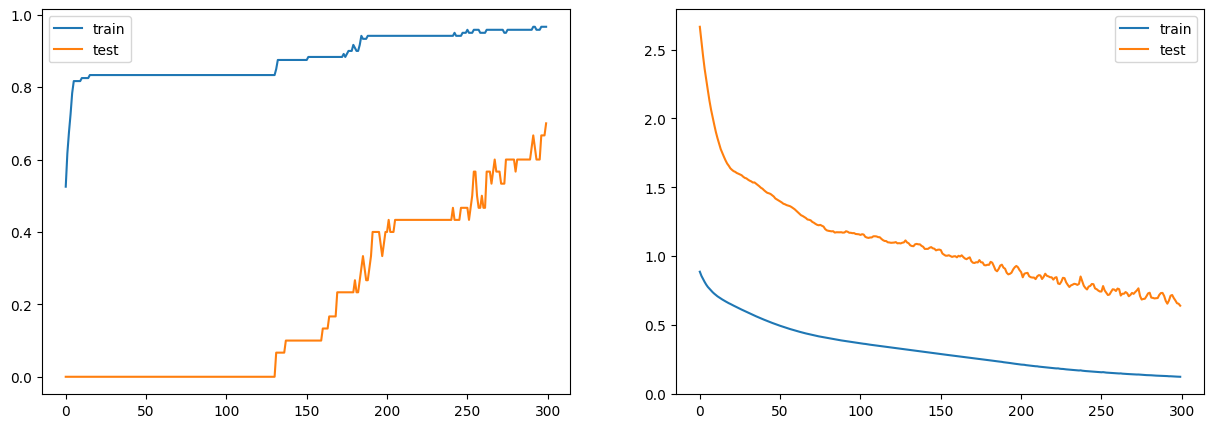

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['train', 'test'])


In [30]:
model.save('model.keras')  # ذخیره مدل